In [969]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [970]:
animeDf=pd.read_csv(r'data/animes.csv')

In [971]:
animeDf.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [972]:
animeDf=animeDf.drop(['link'] ,axis=1)
animeDf.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...


In [973]:
print(f"number of duplicat anime is: {animeDf['uid'].duplicated().sum()}")
animeDf=animeDf[~animeDf['uid'].duplicated()]
print(f"number of duplicat anime after remove: {animeDf['uid'].duplicated().sum()}")

number of duplicat anime is: 3095
number of duplicat anime after remove: 0


In [974]:
print(f"shape of data is: {animeDf.shape}")

shape of data is: (16216, 11)


In [975]:
print(f"number of NA in Data")
animeDf.isna().sum()

number of NA in Data


uid              0
title            0
synopsis       763
genre            0
aired            0
episodes       492
members          0
popularity       0
ranked        1663
score          341
img_url        165
dtype: int64

In [976]:
#null in episodes mean anime not complete yet
animeDf.loc[animeDf['episodes'].isna(),'episodes']='uncomplete'

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_7488\1975777631.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'uncomplete' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  animeDf.loc[animeDf['episodes'].isna(),'episodes']='uncomplete'


In [977]:
animeDf['synopsis'] = animeDf['synopsis'].fillna("")

In [978]:
animeDf[animeDf['score'].isna()]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url
1497,30532,Gundam Build Fighters OVA,The official Twitter account for the Gundam B...,"['Action', 'Mecha', 'Sci-Fi']",Not available,1.0,2663,7290,NaN,NaN,https://cdn.myanimelist.net/images/anime/4/732...
1498,40242,Idomo,The story starts in a mysterious place in the ...,"['Adventure', 'Fantasy']",2020,1.0,170,14113,NaN,NaN,https://cdn.myanimelist.net/images/anime/1059/...
1499,37962,IDOLiSH7: Second Beat!,Second season of IDOLiSH7 .,['Music'],"Apr, 2020 to ?",uncomplete,4709,5972,NaN,NaN,https://cdn.myanimelist.net/images/anime/1312/...
1500,40046,ID:Invaded,Sakaido is a genius detective who can track do...,"['Sci-Fi', 'Mystery']","Jan 6, 2020 to ?",uncomplete,17205,3494,NaN,NaN,https://cdn.myanimelist.net/images/anime/1954/...
1501,39725,I★Chu: Étoile Stage,A famous talent agency called Ailedore has cre...,"['Comedy', 'Music', 'School', 'Slice of Life']",Not available,uncomplete,626,10645,NaN,NaN,https://cdn.myanimelist.net/images/anime/1102/...
...,...,...,...,...,...,...,...,...,...,...,...
14982,40358,Gal to Kyouryuu,"One day, Kaede, a gyaru, picks up a dinosaur a...","['Comedy', 'Seinen', 'Slice of Life']","Apr, 2020 to ?",uncomplete,1479,8997,NaN,NaN,https://cdn.myanimelist.net/images/anime/1428/...
14983,32455,Gekidol,,['Music'],Not available,uncomplete,837,9906,NaN,NaN,https://cdn.myanimelist.net/images/anime/6/778...
14984,35380,Gi(a)rlish Number Shura,,"['Comedy', 'Parody']",Not available,uncomplete,4734,5887,NaN,NaN,https://cdn.myanimelist.net/images/anime/13/85...
15072,39166,Girls & Panzer: Saishuushou Part 3,The third film in the six-part Girls & Panzer...,"['Military', 'School']",Not available,1.0,3355,6797,NaN,NaN,NaN


In [979]:
animeDf['score']=round(animeDf['score'],2)

In [980]:
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'aired': ['uncomplete', 'Not available', '2005', '2003-2005', 'April 2006', 'July 2012']
})

def get_anime_season_from_aired(aired):
    aired = str(aired).strip()
    
    # If value is invalid → return null (NaN)
    if aired.lower() in ['uncomplete', 'not available'] or aired[0].isdigit():
        return np.nan
    
    # Get the first 3 letters of the month
    abbrev = aired[:3].capitalize()
    
    if abbrev in ['Jan', 'Feb', 'Mar']:
        return 'Winter'
    elif abbrev in ['Apr', 'May', 'Jun']:
        return 'Spring'
    elif abbrev in ['Jul', 'Aug', 'Sep']:
        return 'Summer'
    elif abbrev in ['Oct', 'Nov', 'Dec']:
        return 'Fall'
    else:
        return np.nan

# Apply to new column
animeDf['anime_season'] = animeDf['aired'].apply(get_anime_season_from_aired)



In [981]:
import pandas as pd

# Step 2: Clean strings: remove brackets [] and quotes '' if present
animeDf['genre'] = animeDf['genre'].astype(str).apply(lambda x: x.strip("[]").replace("'", ""))

# Step 3: Loop through rows and set genre columns
for index, row in animeDf.iterrows():
    genre_list = [g.strip() for g in row['genre'].split(',') if g.strip()]
    for genre in genre_list:
        animeDf.loc[index, genre] = 1
animeDf.iloc[:,10:]=animeDf.iloc[:,10:].fillna(0)


In [982]:
animeDf

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,Shounen Ai,Cars,Martial Arts,Game,Thriller,Dementia,Harem,Hentai,Yaoi,Yuri
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Comedy, Sports, Drama, School, Shounen","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Drama, Music, Romance, School, Shounen","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Sci-Fi, Adventure, Mystery, Drama, Fantasy","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Action, Military, Adventure, Comedy, Drama, Ma...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Action, Mystery, Supernatural, Vampire","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"Action, Comedy, Super Power, Martial Arts, Sho...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"Slice of Life, Comedy, Supernatural","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","Slice of Life, Comedy, Shounen","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",Action,"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [983]:
def extract_year(aired):
    if isinstance(aired, str):
        aired = aired.strip()
        # If it starts with a number (like "2015", "2008 to 2010")
        if aired and aired[0].isdigit():
            return aired[:4]
        # If it's in format like "Oct 4, 2015 to Mar 27, 2016"
        match = re.search(r'(\d{4})', aired)
        if match:
            return match.group(1)
    return pd.NA  # Use NA for missing/invalid values

animeDf['anime_year'] = animeDf['aired'].apply(extract_year)


In [984]:
animeDf = animeDf.apply(
    lambda col: col.astype('Int64') if (
        pd.api.types.is_numeric_dtype(col) and col.name != 'score'
    ) else col
)
animeDf['anime_year'] = animeDf['anime_year'].astype(str).str.replace(r'\.0$', '', regex=True)
animeDf['episodes'] = animeDf['episodes'].astype(str).str.replace(r'\.0$', '', regex=True)

In [985]:
animeDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16216 entries, 0 to 19006
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            16216 non-null  Int64  
 1   title          16216 non-null  object 
 2   synopsis       16216 non-null  object 
 3   genre          16216 non-null  object 
 4   aired          16216 non-null  object 
 5   episodes       16216 non-null  object 
 6   members        16216 non-null  Int64  
 7   popularity     16216 non-null  Int64  
 8   ranked         14553 non-null  Int64  
 9   score          15875 non-null  float64
 10  img_url        16216 non-null  object 
 11  anime_season   16216 non-null  object 
 12  Comedy         16216 non-null  Int64  
 13  Sports         16216 non-null  Int64  
 14  Drama          16216 non-null  Int64  
 15  School         16216 non-null  Int64  
 16  Shounen        16216 non-null  Int64  
 17  Music          16216 non-null  Int64  
 18  Romance    

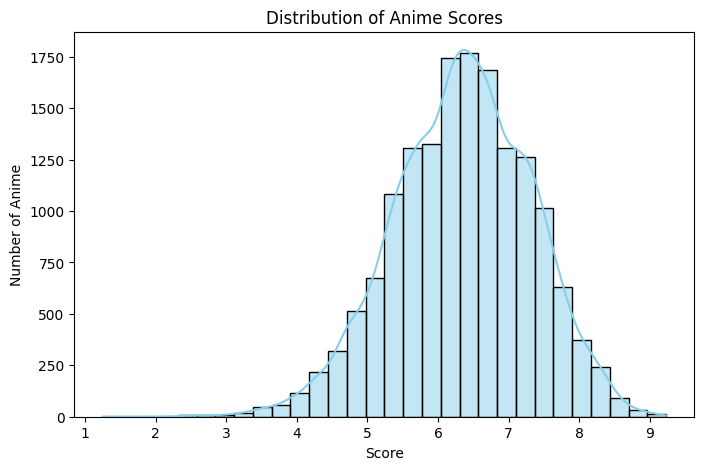

In [987]:
plt.figure(figsize=(8, 5))
sns.histplot(animeDf['score'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Number of Anime')
plt.show()

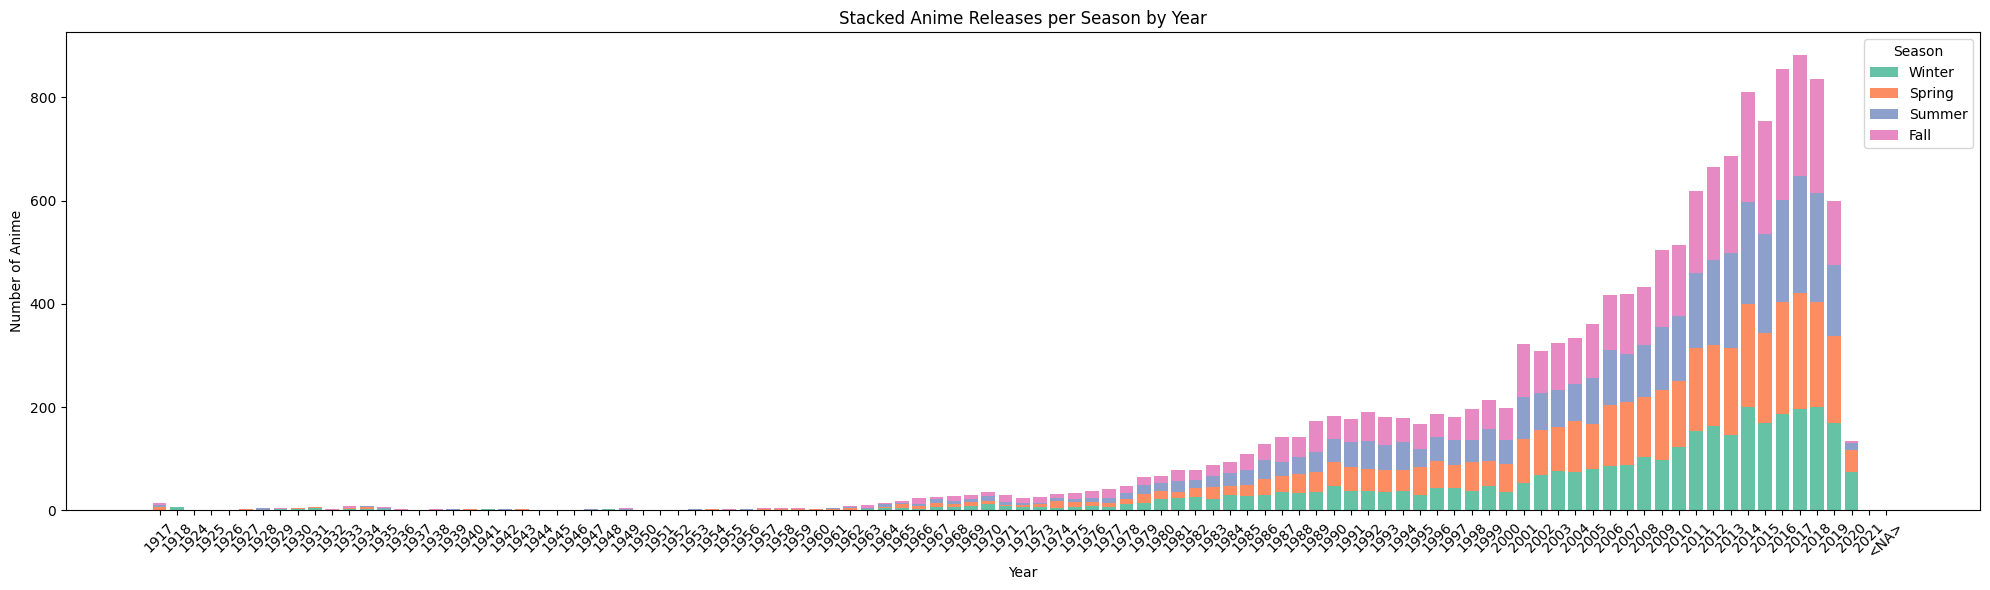

In [988]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group and reshape data
season_counts = animeDf.groupby(['anime_year', 'anime_season']).size().unstack(fill_value=0)
season_counts = season_counts[['Winter', 'Spring', 'Summer', 'Fall']]  # ensure season order

# Define colors from Seaborn
colors = sns.color_palette("Set2", n_colors=4)  # or "pastel", "muted", etc.

# Plot

plt.figure(figsize=(20, 6))
bottom = None

for i, season in enumerate(season_counts.columns):
    plt.bar(season_counts.index, season_counts[season], 
            bottom=season_counts.iloc[:, :i].sum(axis=1) if i > 0 else None,
            color=colors[i], label=season)

plt.title('Stacked Anime Releases per Season by Year')
plt.xlabel('Year')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


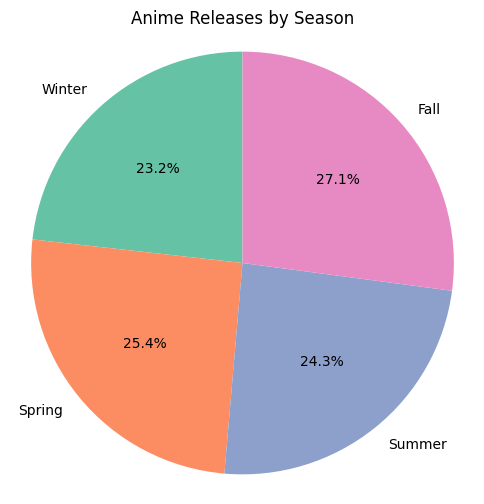

In [989]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the anime per season
season_counts = animeDf['anime_season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Drop NaN just in case
season_counts = season_counts.dropna()

# Seaborn color palette
colors = sns.color_palette("Set2", len(season_counts))

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    season_counts, 
    labels=season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
plt.title('Anime Releases by Season')
plt.axis('equal')  # Keep the pie circular
plt.show()



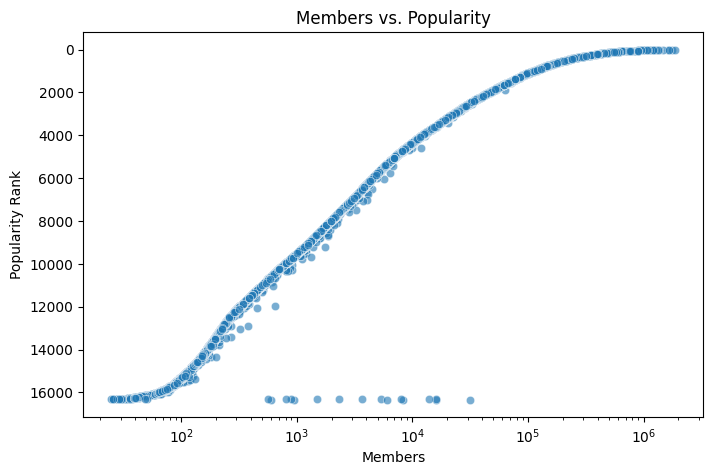

In [990]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=animeDf, x='members', y='popularity', alpha=0.6)
plt.title('Members vs. Popularity')
plt.xlabel('Members')
plt.ylabel('Popularity Rank')
plt.xscale('log')
plt.gca().invert_yaxis()
plt.show()


In [991]:
reviewsDf=pd.read_csv(r'data/reviews.csv')

In [992]:
reviewsDf.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [993]:
print(f"shape of data is: {reviewsDf.shape}")

shape of data is: (192112, 7)


In [994]:
#sure user make one review to same anime
print(reviewsDf[['anime_uid', 'profile']].duplicated().sum())
reviewsDf.drop_duplicates(subset=['anime_uid', 'profile'], keep="last",inplace=True)
print(reviewsDf[['anime_uid', 'profile']].duplicated().sum())

61593
0


In [995]:
print(f"number of NA in Data")
reviewsDf.isna().sum()

number of NA in Data


uid          0
profile      0
anime_uid    0
text         0
score        0
scores       0
link         0
dtype: int64

In [996]:
reviewsDf.describe()

,uid,anime_uid,score
count,130519.000000,130519.000000,130519.000000
mean,186880.155839,15696.469855,7.329737
std,99244.778774,13479.395334,2.321337
min,1.000000,1.000000,0.000000
25%,99189.000000,2476.000000,6.000000
50%,210512.000000,11755.000000,8.000000
75%,270414.500000,30484.000000,9.000000
max,325747.000000,40807.000000,11.000000


In [997]:
# max score is data inconsistan
reviewsDf=reviewsDf[reviewsDf['score']<=10]


In [998]:
reviewsDf['score']=round(reviewsDf['score'],2)

In [999]:
import pandas as pd
import ast

reviewsDf['scores_dict'] =reviewsDf['scores'].apply(ast.literal_eval)

scores_expanded = pd.json_normalize(reviewsDf['scores_dict'])


scores_expanded.columns = [f"{col}_score" for col in scores_expanded.columns]

reviewsDf = pd.concat([reviewsDf.drop(columns=['scores', 'scores_dict']), scores_expanded], axis=1)

reviewsDf.head()


,uid,profile,anime_uid,text,score,link,Overall_score,Story_score,Animation_score,Sound_score,Character_score,Enjoyment_score
60871,322665.0,sdrowkcab,40131.0,\n \n \n \n ...,4.0,https://myanimelist.net/reviews.php?id=322665,5,5,3,5,4,6
60872,250601.0,INU4SH4,5569.0,\n \n \n \n ...,1.0,https://myanimelist.net/reviews.php?id=250601,7,7,9,9,6,7
60873,300563.0,thetickdickler,4310.0,\n \n \n \n ...,1.0,https://myanimelist.net/reviews.php?id=300563,10,10,9,9,10,10
60874,265514.0,Sidewinder51,11141.0,\n \n \n \n ...,5.0,https://myanimelist.net/reviews.php?id=265514,9,9,9,8,9,10
60875,93837.0,fatmacman,4310.0,\n \n \n \n ...,1.0,https://myanimelist.net/reviews.php?id=93837,9,9,9,7,10,9


In [1000]:
reviewsDf=reviewsDf.drop(['text','link','uid','Overall_score'] ,axis=1)
reviewsDf.head()

,profile,anime_uid,score,Story_score,Animation_score,Sound_score,Character_score,Enjoyment_score
60871,sdrowkcab,40131.0,4.0,5,3,5,4,6
60872,INU4SH4,5569.0,1.0,7,9,9,6,7
60873,thetickdickler,4310.0,1.0,10,9,9,10,10
60874,Sidewinder51,11141.0,5.0,9,9,8,9,10
60875,fatmacman,4310.0,1.0,9,9,7,10,9


In [1001]:
reviewsDf = reviewsDf.merge(
    animeDf[['uid', 'title','img_url']], 
    how='inner', 
    left_on='anime_uid', 
    right_on='uid'
)

In [1002]:
reviewsDf.head()

,profile,anime_uid,score,Story_score,Animation_score,Sound_score,Character_score,Enjoyment_score,uid,title,img_url
0,sdrowkcab,40131.0,4.0,5,3,5,4,6,40131,Junjou Juugeki Cosplay Shoujo,https://cdn.myanimelist.net/images/anime/1345/...
1,INU4SH4,5569.0,1.0,7,9,9,6,7,5569,Tsui no Sora,https://cdn.myanimelist.net/images/anime/2/115...
2,thetickdickler,4310.0,1.0,10,9,9,10,10,4310,Joshidai: Ecchi Soudanshitsu,https://cdn.myanimelist.net/images/anime/9/221...
3,Sidewinder51,11141.0,5.0,9,9,8,9,10,11141,Blue Seagull,https://cdn.myanimelist.net/images/anime/3/308...
4,fatmacman,4310.0,1.0,9,9,7,10,9,4310,Joshidai: Ecchi Soudanshitsu,https://cdn.myanimelist.net/images/anime/9/221...


In [1003]:
#filter Data from +18 Genre

filter_anime_titles=animeDf[(animeDf['Yaoi'] == 1) | (animeDf['Yuri'] == 1) | (animeDf['Hentai'] == 1)].title
reviewsDf = reviewsDf[~reviewsDf['title'].isin(filter_anime_titles)]
animeDf=animeDf[~animeDf['title'].isin(filter_anime_titles)]
animeDf.drop(['Yaoi', 'Yuri', 'Hentai'], axis=1, inplace=True)

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_7488\211450989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=enjoy_corr.values, y=enjoy_corr.index, palette='viridis')


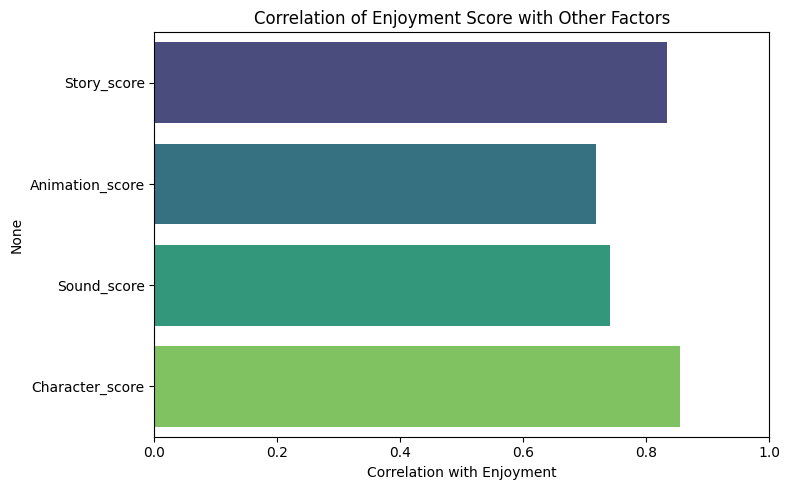

In [1004]:

# Ensure numeric types
score_cols = ['score', 'Story_score', 'Animation_score', 'Sound_score', 'Character_score', 'Enjoyment_score']
for col in score_cols:
    reviewsDf[col] = pd.to_numeric(reviewsDf[col], errors='coerce')

# Compute correlation with Enjoyment_score
enjoy_corr = reviewsDf[score_cols].corr()['Enjoyment_score'].drop(['Enjoyment_score','score'])

# Plot as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=enjoy_corr.values, y=enjoy_corr.index, palette='viridis')
plt.title("Correlation of Enjoyment Score with Other Factors")
plt.xlabel("Correlation with Enjoyment")
plt.xlim(0, 1)  # Correlation range
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


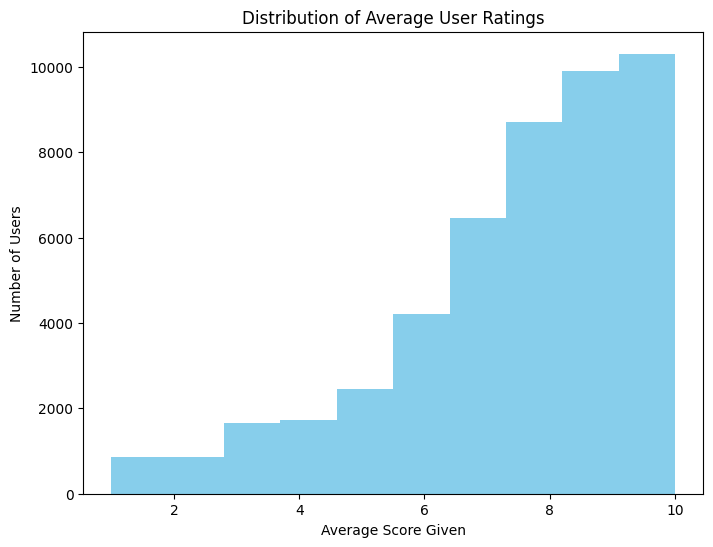

In [1005]:
user_avg = reviewsDf.groupby('profile')['score'].mean().sort_values()

plt.figure(figsize=(8, 6))
user_avg.plot(kind='hist', bins=10, color='skyblue')
plt.title("Distribution of Average User Ratings")
plt.xlabel("Average Score Given")
plt.ylabel("Number of Users")
plt.show()


In [1007]:
animeDf.to_csv(r"data/anime_genre.csv", index=False)
reviewsDf.to_csv(r"data/user_rate.csv", index=False)